In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import limpieza
import outliers
import analisis_bi_multi
import var_selection

In [3]:
df= pd.read_csv('D:\Documentos\CreditData1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   FURNITURE         1000 non-null   int64
 7   RADIO/TV          1000 non-null   int64
 8   EDUCATION         1000 non-null   int64
 9   RETRAINING        1000 non-null   int64
 10  AMOUNT            1000 non-null   int64
 11  SAV_ACCT          1000 non-null   int64
 12  EMPLOYMENT        1000 non-null   int64
 13  INSTALL_RATE      1000 non-null   int64
 14  MALE_DIV          1000 non-null   int64
 15  MALE_SINGLE       1000 non-null   int64
 16  MALE_MAR_or_WID   1000 non-null   int64
 17  CO-APPLICANT      1000 non-null   

In [5]:
df['PRESENT_RESIDENT']= df['PRESENT_RESIDENT'].replace({1:0,2:1,3:2,4:3})
df.rename(columns={'CO-APPLICANT': 'CO_APPLICANT','RADIO/TV': 'RADIO_TV'}, inplace=True)

In [6]:
def type(df,column,types):
    df[column]= df[column].astype(types)
    return

In [7]:
type(df,'CHK_ACCT',"category")
type(df,'HISTORY', "category")
type(df,'SAV_ACCT',"category")
type(df,'EMPLOYMENT',"category")
type(df,'PRESENT_RESIDENT',"category")
type(df,'JOB',"category")

type(df,'NEW_CAR',"uint8")
type(df,'USED_CAR',"uint8")
type(df,'FURNITURE',"uint8")
type(df,'RADIO_TV',"uint8")
type(df,'EDUCATION',"uint8")
type(df,'RETRAINING',"uint8")
type(df,'MALE_DIV',"uint8")
type(df,'MALE_SINGLE',"uint8")
type(df,'MALE_MAR_or_WID',"uint8")
type(df, 'CO_APPLICANT',"uint8")
type(df,'GUARANTOR',"uint8")
type(df,'REAL_ESTATE',"uint8")
type(df,'PROP_UNKN_NONE',"uint8")
type(df, 'OTHER_INSTALL',"uint8")
type(df,'RENT',"uint8")
type(df,'OWN_RES',"uint8")
type(df, 'TELEPHONE',"uint8")
type(df,'FOREIGN',"uint8")

In [8]:
df= df.drop(columns=['OBS#','DEFAULT'])

In [9]:
limpieza.nan(df)

CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO_TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO_APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
dtype: int64

In [10]:
limpieza.shapiro(df)

{'DURATION': (0.8997892737388611, 4.908141189598946e-25),
 'AMOUNT': (0.7933971881866455, 8.609912964372653e-34),
 'INSTALL_RATE': (0.7885838150978088, 4.300877608624469e-34),
 'AGE': (0.9174706339836121, 6.380969644587929e-23),
 'NUM_CREDITS': (0.659945011138916, 1.256964722499361e-40),
 'NUM_DEPENDENTS': (0.4334179162979126, 0.0)}

array([[<AxesSubplot:title={'center':'DURATION'}>,
        <AxesSubplot:title={'center':'NEW_CAR'}>,
        <AxesSubplot:title={'center':'USED_CAR'}>,
        <AxesSubplot:title={'center':'FURNITURE'}>,
        <AxesSubplot:title={'center':'RADIO_TV'}>],
       [<AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'RETRAINING'}>,
        <AxesSubplot:title={'center':'AMOUNT'}>,
        <AxesSubplot:title={'center':'INSTALL_RATE'}>,
        <AxesSubplot:title={'center':'MALE_DIV'}>],
       [<AxesSubplot:title={'center':'MALE_SINGLE'}>,
        <AxesSubplot:title={'center':'MALE_MAR_or_WID'}>,
        <AxesSubplot:title={'center':'CO_APPLICANT'}>,
        <AxesSubplot:title={'center':'GUARANTOR'}>,
        <AxesSubplot:title={'center':'REAL_ESTATE'}>],
       [<AxesSubplot:title={'center':'PROP_UNKN_NONE'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'OTHER_INSTALL'}>,
        <AxesSubplot:title={'center':'RENT'}>,
   

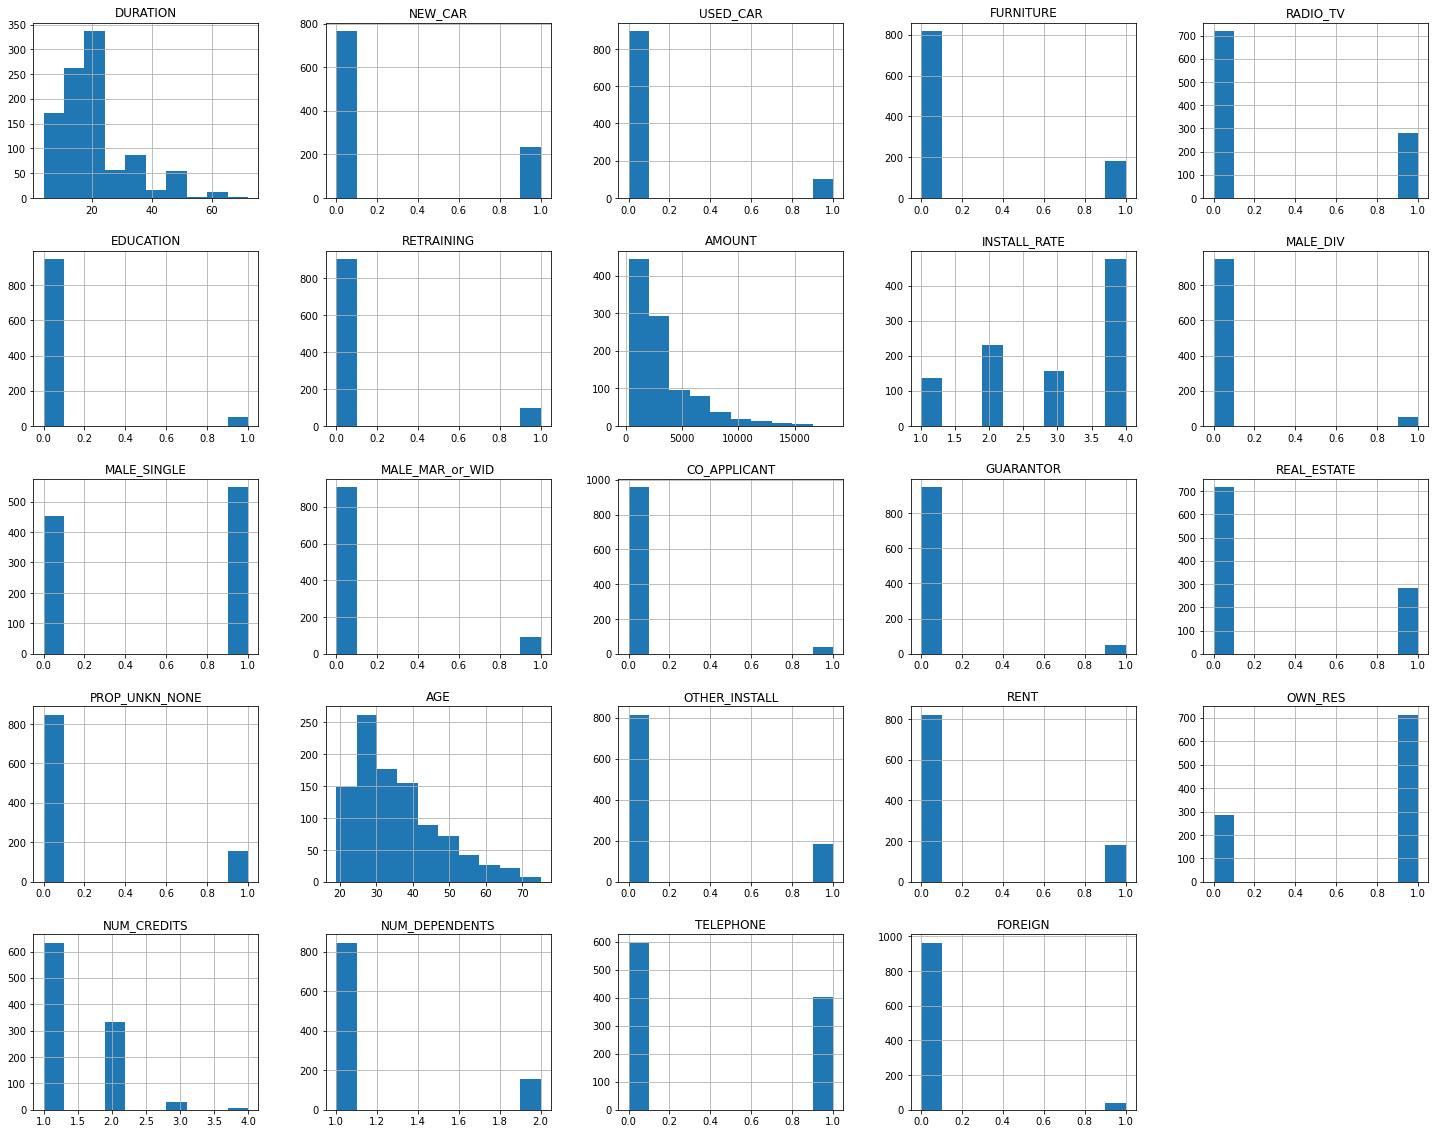

In [11]:
df.hist(figsize=(25,20))

### Hemos limpiado nuestro dataset por completo, ahora solo falta analizar los outliers, que haremos dos dataset porque tenemos diferentes metodos de limpieza.

In [12]:
df1= outliers.knn_outliers(df,0.1)

In [13]:
df1

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
0,0,6,4,0,0,0,1,0,0,1169,...,0,67,0,0,1,2,2,1,1,0
1,1,48,2,0,0,0,1,0,0,5951,...,0,22,0,0,1,1,2,1,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,0,49,0,0,1,1,1,2,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,0,45,0,0,0,1,2,2,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,1,53,0,0,0,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,3,12,2,0,0,1,0,0,0,1736,...,0,31,0,0,1,1,1,1,0,0
913,0,30,2,0,1,0,0,0,0,3857,...,0,40,0,0,1,1,3,1,1,0
914,3,12,2,0,0,0,1,0,0,804,...,0,38,0,0,1,1,2,1,0,0
915,0,45,2,0,0,0,1,0,0,1845,...,1,23,0,0,0,1,2,1,1,0


array([[<AxesSubplot:title={'center':'DURATION'}>,
        <AxesSubplot:title={'center':'NEW_CAR'}>,
        <AxesSubplot:title={'center':'USED_CAR'}>,
        <AxesSubplot:title={'center':'FURNITURE'}>,
        <AxesSubplot:title={'center':'RADIO_TV'}>],
       [<AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'RETRAINING'}>,
        <AxesSubplot:title={'center':'AMOUNT'}>,
        <AxesSubplot:title={'center':'INSTALL_RATE'}>,
        <AxesSubplot:title={'center':'MALE_DIV'}>],
       [<AxesSubplot:title={'center':'MALE_SINGLE'}>,
        <AxesSubplot:title={'center':'MALE_MAR_or_WID'}>,
        <AxesSubplot:title={'center':'CO_APPLICANT'}>,
        <AxesSubplot:title={'center':'GUARANTOR'}>,
        <AxesSubplot:title={'center':'REAL_ESTATE'}>],
       [<AxesSubplot:title={'center':'PROP_UNKN_NONE'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'OTHER_INSTALL'}>,
        <AxesSubplot:title={'center':'RENT'}>,
   

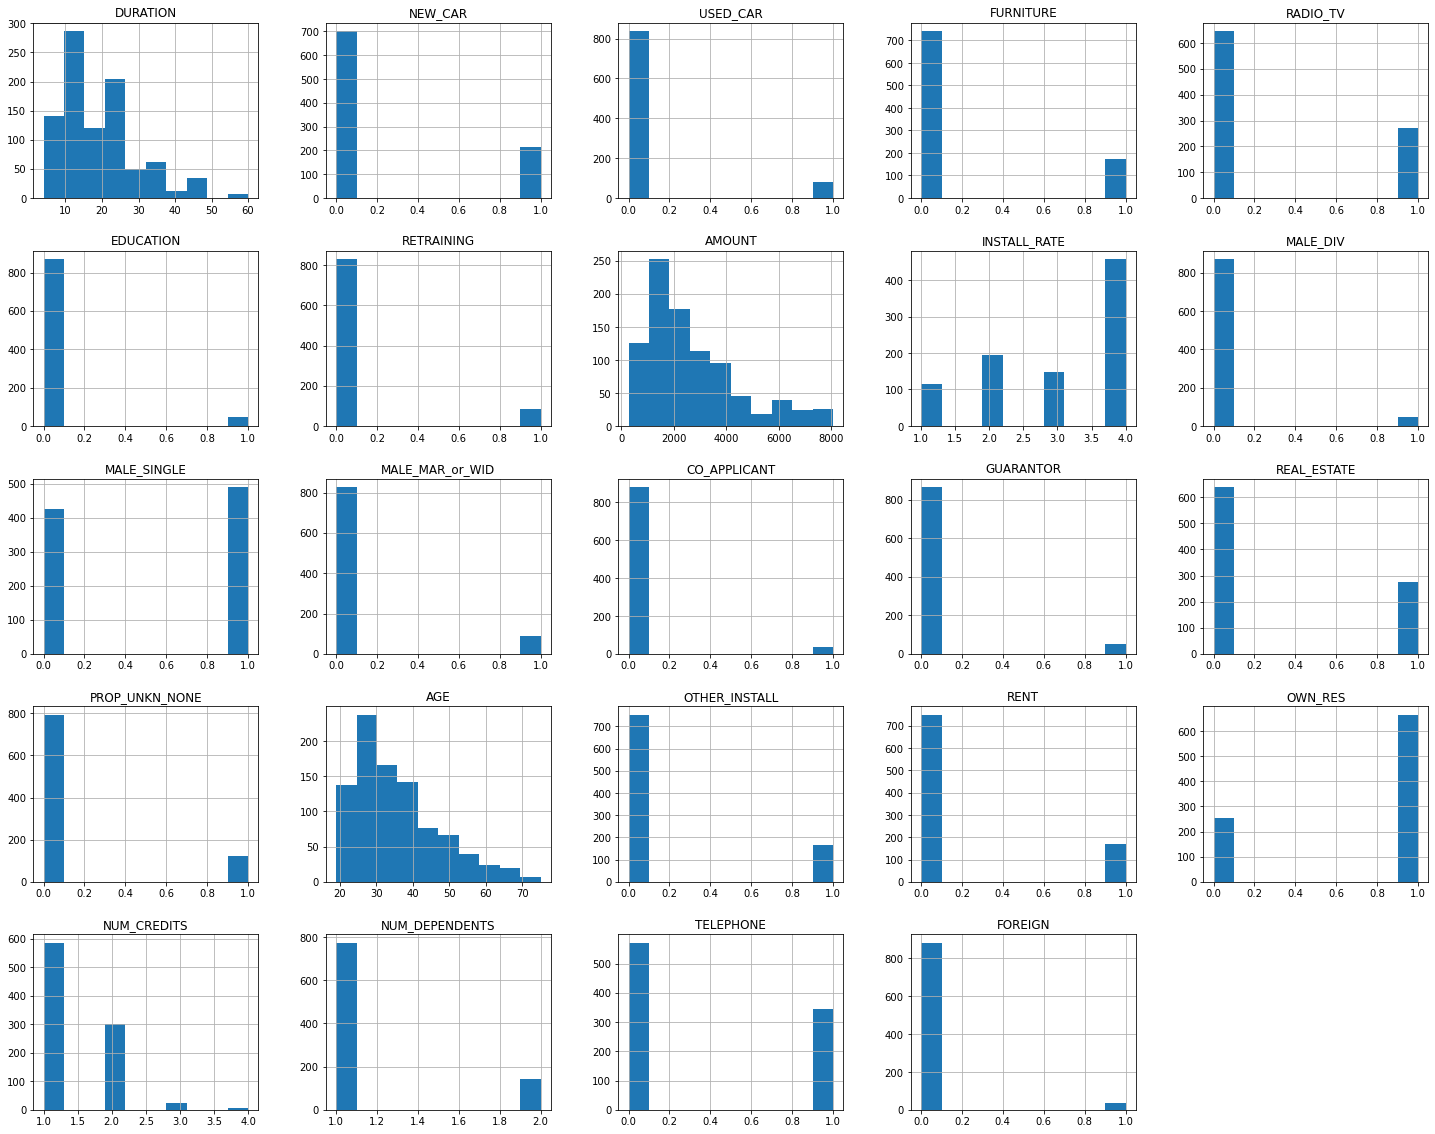

In [14]:
df1.hist(figsize=(25,20))

In [15]:
df2= outliers.isolation(df,0.1)

D:\Anaconda\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [16]:
df2

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN
0,0,6,4,0,0,0,1,0,0,1169,...,0,67,0,0,1,2,2,1,1,0
1,1,48,2,0,0,0,1,0,0,5951,...,0,22,0,0,1,1,2,1,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,0,49,0,0,1,1,1,2,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,0,45,0,0,0,1,2,2,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,1,53,0,0,0,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,3,12,2,0,0,1,0,0,0,1736,...,0,31,0,0,1,1,1,1,0,0
896,0,30,2,0,1,0,0,0,0,3857,...,0,40,0,0,1,1,3,1,1,0
897,3,12,2,0,0,0,1,0,0,804,...,0,38,0,0,1,1,2,1,0,0
898,0,45,2,0,0,0,1,0,0,1845,...,1,23,0,0,0,1,2,1,1,0


array([[<AxesSubplot:title={'center':'DURATION'}>,
        <AxesSubplot:title={'center':'NEW_CAR'}>,
        <AxesSubplot:title={'center':'USED_CAR'}>,
        <AxesSubplot:title={'center':'FURNITURE'}>,
        <AxesSubplot:title={'center':'RADIO_TV'}>],
       [<AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'RETRAINING'}>,
        <AxesSubplot:title={'center':'AMOUNT'}>,
        <AxesSubplot:title={'center':'INSTALL_RATE'}>,
        <AxesSubplot:title={'center':'MALE_DIV'}>],
       [<AxesSubplot:title={'center':'MALE_SINGLE'}>,
        <AxesSubplot:title={'center':'MALE_MAR_or_WID'}>,
        <AxesSubplot:title={'center':'CO_APPLICANT'}>,
        <AxesSubplot:title={'center':'GUARANTOR'}>,
        <AxesSubplot:title={'center':'REAL_ESTATE'}>],
       [<AxesSubplot:title={'center':'PROP_UNKN_NONE'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'OTHER_INSTALL'}>,
        <AxesSubplot:title={'center':'RENT'}>,
   

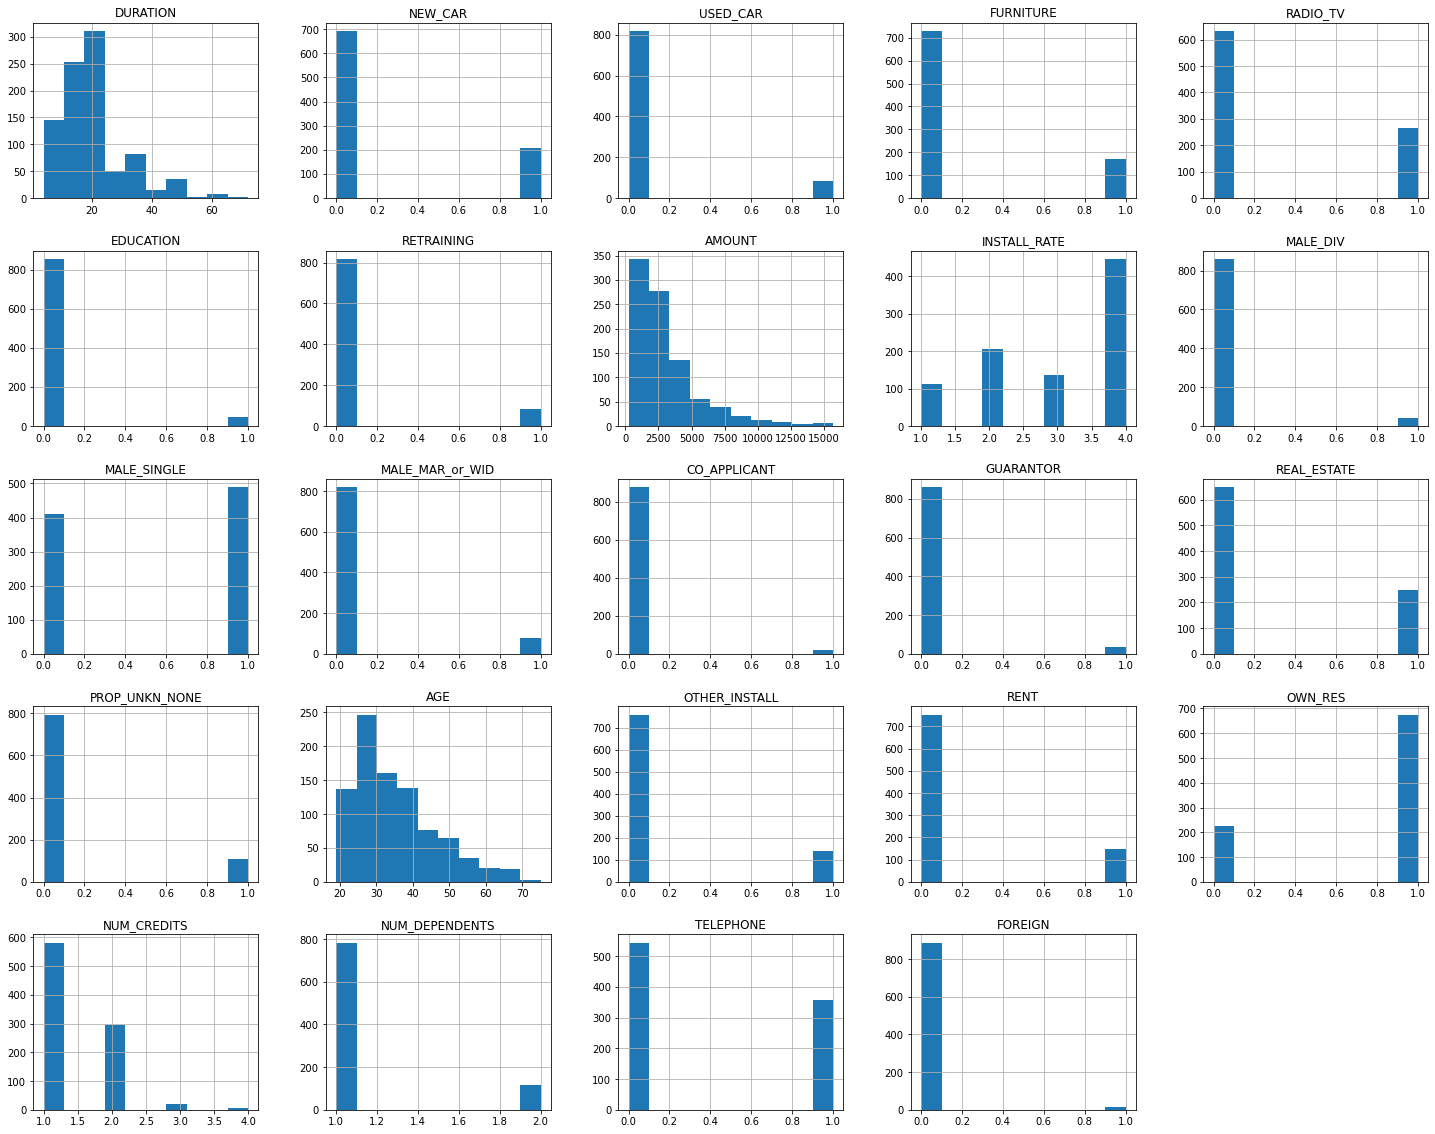

In [17]:
df2.hist(figsize=(25,20))

### Podemos visualizar que nuestros datos fueron perfectamente limpiados de outliers.

### Crearemos un KNN para segmentar a los clientes

In [97]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [101]:
scaler= RobustScaler()

In [102]:
data_scaler= scaler.fit_transform(df1)

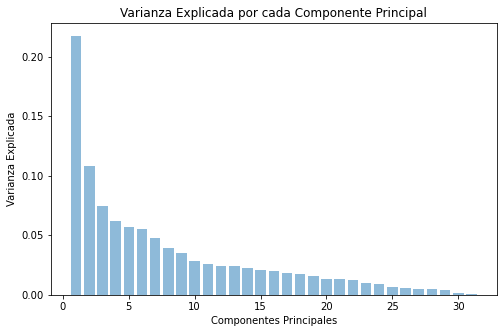

In [103]:
pca = PCA(random_state=0)
X_pca = pca.fit_transform(data_scaler)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por cada Componente Principal')
plt.show()


In [111]:
pca = PCA(n_components=2,random_state=0)
X_pca = pca.fit_transform(data_scaler)

In [112]:
X_pca

array([[-0.16840548,  3.16711633],
       [ 2.29330842, -2.08917035],
       [-0.41687306,  1.07431558],
       ...,
       [-1.06756392,  0.59589401],
       [ 1.792636  , -1.13867655],
       [ 2.27759318, -1.23442982]])

In [113]:
distorciones= []

K= range(1,8)

for k in K:
    kmeans= KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    distorciones.append(kmeans.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

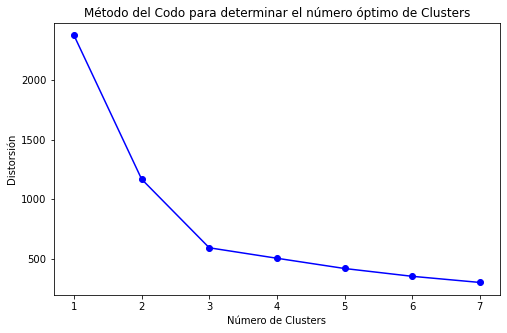

In [114]:
plt.figure(figsize=(8, 5))
plt.plot(K, distorciones, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión')
plt.title('Método del Codo para determinar el número óptimo de Clusters')
plt.show()

In [115]:
kmeans= KMeans(n_clusters=3, random_state=0)
df1['Cluster']= kmeans.fit_predict(X_pca)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [116]:
df1

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,Cluster
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,2
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,2
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,0
913,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,2
914,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,0
915,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,2


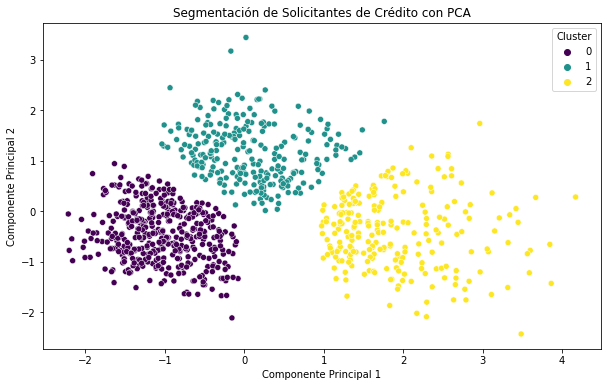

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df1['Cluster'], palette='viridis')
plt.title('Segmentación de Solicitantes de Crédito con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [118]:
df1[df1['Cluster']==0].describe()

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,INSTALL_RATE,MALE_DIV,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,NUM_DEPENDENTS,TELEPHONE,FOREIGN,Cluster
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.0
mean,14.725400,0.251716,0.034325,0.249428,0.308924,0.036613,0.068650,1865.389016,2.929062,0.043478,...,0.050343,29.649886,0.173913,0.244851,0.727689,1.256293,1.105263,0.235698,0.057208,0.0
std,5.942972,0.434496,0.182271,0.433178,0.462580,0.188026,0.253148,979.153578,1.150190,0.204165,...,0.218903,6.969697,0.379469,0.430492,0.445659,0.462580,0.307244,0.424921,0.232506,0.0
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,276.000000,1.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1206.000000,2.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
50%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1577.000000,3.000000,0.000000,...,0.000000,28.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
75%,18.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2404.000000,4.000000,0.000000,...,0.000000,33.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7472.000000,4.000000,1.000000,...,1.000000,56.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,0.0


In [119]:
df1[df1['Cluster']==1].describe()

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,INSTALL_RATE,MALE_DIV,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,NUM_DEPENDENTS,TELEPHONE,FOREIGN,Cluster
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.0
mean,15.623016,0.293651,0.079365,0.099206,0.321429,0.067460,0.071429,2011.365079,3.250000,0.047619,...,0.178571,46.507937,0.182540,0.103175,0.757937,1.654762,1.234127,0.496032,0.035714,1.0
std,6.924518,0.456340,0.270846,0.299534,0.467954,0.251317,0.258052,1139.783736,1.027995,0.213383,...,0.383755,11.188886,0.387057,0.304792,0.429185,0.694211,0.424295,0.500979,0.185946,0.0
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,338.000000,1.000000,0.000000,...,0.000000,23.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1234.750000,2.000000,0.000000,...,0.000000,37.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
50%,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1596.000000,4.000000,0.000000,...,0.000000,46.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.0
75%,24.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2650.750000,4.000000,0.000000,...,0.000000,54.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.0
max,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6761.000000,4.000000,1.000000,...,1.000000,75.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.0


In [120]:
df1[df1['Cluster']==2].describe()

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO_TV,EDUCATION,RETRAINING,AMOUNT,INSTALL_RATE,MALE_DIV,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,NUM_DEPENDENTS,TELEPHONE,FOREIGN,Cluster
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.0
mean,32.521930,0.135965,0.192982,0.179825,0.236842,0.057018,0.162281,4837.666667,3.004386,0.061404,...,0.250000,34.872807,0.188596,0.153509,0.679825,1.394737,1.166667,0.517544,0.004386,2.0
std,10.626393,0.343505,0.395508,0.384886,0.426080,0.232386,0.369519,1692.761918,1.055707,0.240597,...,0.433965,9.910461,0.392048,0.361270,0.467570,0.516143,0.373498,0.500792,0.066227,0.0
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1819.000000,1.000000,0.000000,...,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.0
25%,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3508.000000,2.000000,0.000000,...,0.000000,27.750000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.0
50%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4579.500000,3.000000,0.000000,...,0.000000,33.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.0
75%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6306.250000,4.000000,0.000000,...,0.250000,40.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.0
max,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8065.000000,4.000000,1.000000,...,1.000000,75.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,2.0
